<a href="https://colab.research.google.com/github/pmSLUMSHDS/hds5210-2023/blob/main/week14/week14_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with multiple data sets

There are two data files that we'll be working with for this week's assignment.  They are described below.  Load those data files in with Pandas and then work to answering each of the questions below.  All of these files are found in our usual s3 bucket: `https://hds5210-data.s3.amazonaws.com`

## npidata.csv

This file is basic information about every healthcare provider in the US.  It has one row for each NPI (National Provider Identifier).  It contains information such as the provider's name and address.

* https://hds5210-data.s3.amazonaws.com/npidata.csv


## cmsYYYY.csv

These are files about what kinds of procedures and patients providers in the US are serving under CMS programs, Medicare and Medicaid.  Each contains various statistics about providers over the course of a year.  There are three of these, for the years 2014, 2015, and 2016.  These files, however, don't contain information about the provider such as where the provider is located.

* https://hds5210-data.s3.amazonaws.com/cms2014.csv
* https://hds5210-data.s3.amazonaws.com/cms2015.csv
* https://hds5210-data.s3.amazonaws.com/cms2016.csv

## Our Goals

For this assignment, we're going to want to compute some statistics based on the data in the **cms** files, but aggregate that data based on information in the **npidata** file.  As in last week's assignment, you'll need to store your answers in a variable called `answer` at the end of each step.

**PSEUDOCODE**

imported pandas and all 4 csv files.

once loaded, the NPI file said to set low_memory to False, so did that

checked the shape of each to see if number of columns were the same and how many rows we're talking about

then checked the head of each to see how columns might be different and what might need to be addressed before truly beginning.

One cms file for 2016 had all column names in uppercase while the other 2 cms files (2014, 2015) were lowercase.

Good to know...

In [1]:
import pandas as pd

npidata = pd.read_csv('https://hds5210-data.s3.amazonaws.com/npidata.csv', low_memory=False)

cms2014 = pd.read_csv('https://hds5210-data.s3.amazonaws.com/cms2014.csv')
cms2015 = pd.read_csv('https://hds5210-data.s3.amazonaws.com/cms2015.csv')
cms2016 = pd.read_csv('https://hds5210-data.s3.amazonaws.com/cms2016.csv')



In [2]:
cms2014.shape

(63093, 59)

In [3]:
cms2015.shape

(64540, 59)

In [4]:
cms2016.shape

(66229, 59)

In [5]:
npidata.shape

(251661, 43)

In [6]:
npidata.head()

,row,NPI,Entity Type Code,Replacement NPI,Employer Identification Number (EIN),Provider Organization Name (Legal Business Name),Provider Last Name (Legal Name),Provider First Name,Provider Middle Name,Provider Name Prefix Text,...,Provider Business Practice Location Address Postal Code,Provider Business Practice Location Address Country Code (If outside U.S.),Provider Business Practice Location Address Telephone Number,Provider Business Practice Location Address Fax Number,Provider Enumeration Date,Last Update Date,NPI Deactivation Reason Code,NPI Deactivation Date,NPI Reactivation Date,Provider Gender Code
0,13,1205839354,1.0,NaN,NaN,NaN,DIFILIPPO,EMIL,A,DR.,...,633664281.0,US,6365615030,6.365615e+09,05/23/2005,05/06/2015,NaN,NaN,NaN,M
1,15,1023011079,2.0,NaN,<UNAVAIL>,"ADVANTAGE HOME HEALTH CARE, INC.",NaN,NaN,NaN,NaN,...,604508812.0,US,8154671905,8.154676e+09,05/23/2005,12/12/2014,NaN,NaN,NaN,NaN
2,74,1932102969,1.0,NaN,NaN,NaN,HELFER,TAMARA,G,DR.,...,618203909.0,US,2173661255,2.173666e+09,05/23/2005,01/24/2014,NaN,NaN,NaN,F
3,88,1477556405,1.0,NaN,NaN,NaN,LINSENMEYER,CHARLES,M,DR.,...,633012881.0,US,6369467050,6.369463e+09,05/23/2005,07/08/2007,NaN,NaN,NaN,M
4,89,1386647311,1.0,NaN,NaN,NaN,LASKEN,GARY,W,DR.,...,616142078.0,US,3096925500,3.096926e+09,05/23/2005,05/19/2011,NaN,NaN,NaN,M


In [7]:
cms2014.head()

,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,total_medicare_payment_amt,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,Beneficiary_Average_Risk_Score
0,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,321641.88,245364.34,...,12.0,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007
1,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,34060.09,26055.17,...,NaN,39.0,64.0,75.0,32.0,NaN,68.0,NaN,NaN,1.1912
2,21,1003001322,Mass Immunization Roster Biller,Y,7,788.0,370,21640.24,21634.91,21199.22,...,13.0,18.0,42.0,49.0,24.0,5.0,25.0,NaN,3.0,0.8019
3,37,1003002486,Chiropractic,Y,2,142.0,22,7458.44,5037.51,3727.01,...,NaN,NaN,59.0,59.0,NaN,0.0,64.0,0.0,0.0,0.7920
4,73,1003005430,Clinical Psychologist,Y,3,130.0,11,20640.00,14968.22,11334.69,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.9718


In [8]:
cms2015.head()

,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,total_medicare_payment_amt,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,Beneficiary_Average_Risk_Score
0,1,1003000134,Pathology,Y,15,10143.0,4686,1602301.00,387805.69,291591.11,...,12.0,21.0,52.0,56.0,27.0,8.0,38.0,1.0,3.0,1.0563
1,20,1003001249,Physical Therapist,Y,8,1509.0,75,106992.87,41160.35,31971.55,...,16.0,31.0,59.0,75.0,24.0,NaN,65.0,0.0,NaN,1.0572
2,22,1003001322,Mass Immunization Roster Biller,Y,6,776.0,386,19022.33,19022.33,18641.60,...,13.0,21.0,44.0,53.0,24.0,3.0,25.0,NaN,NaN,0.8875
3,39,1003002486,Chiropractic,Y,2,128.0,13,8265.24,4832.51,3178.96,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.9662
4,75,1003005430,Clinical Psychologist,Y,3,169.0,14,27220.00,19901.25,15269.41,...,75.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.1064


In [9]:
cms2016.head()

,nbr,NPI,PROVIDER_TYPE,MEDICARE_PARTICIPATION_INDICATOR,NUMBER_OF_HCPCS,TOTAL_SERVICES,TOTAL_UNIQUE_BENES,TOTAL_SUBMITTED_CHRG_AMT,TOTAL_MEDICARE_ALLOWED_AMT,TOTAL_MEDICARE_PAYMENT_AMT,...,BENEFICIARY_CC_DEPR_PERCENT,BENEFICIARY_CC_DIAB_PERCENT,BENEFICIARY_CC_HYPERL_PERCENT,BENEFICIARY_CC_HYPERT_PERCENT,BENEFICIARY_CC_IHD_PERCENT,BENEFICIARY_CC_OST_PERCENT,BENEFICIARY_CC_RAOA_PERCENT,BENEFICIARY_CC_SCHIOT_PERCENT,BENEFICIARY_CC_STRK_PERCENT,BENEFICIARY_AVERAGE_RISK_SCORE
0,1,1003000134,Pathology,Y,18,8704.0,4003,1372997.00,343624.25,256165.66,...,13.0,21.0,46.0,54.0,26.0,9.0,38.0,1.0,3.0,1.0925
1,19,1003001249,Physical Therapist in Private Practice,Y,7,1792.0,76,131387.15,48363.25,37171.51,...,21.0,36.0,57.0,75.0,24.0,NaN,75.0,0.0,NaN,1.0063
2,21,1003001322,Mass Immunizer Roster Biller,Y,4,404.0,202,14616.62,12362.20,12115.76,...,7.0,20.0,40.0,43.0,16.0,6.0,21.0,NaN,NaN,0.7684
3,39,1003002486,Chiropractic,Y,2,136.0,13,5910.00,5013.02,3382.90,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,1.1891
4,74,1003005430,"Psychologist, Clinical",Y,3,201.0,21,32270.00,23437.47,17193.96,...,75.0,NaN,62.0,57.0,NaN,NaN,NaN,0.0,NaN,1.2509


## Part 1

In this first step, we'll need to merge together all of the **cms** files into a single dataframe.  Be careful that these files might not be identical, so you'll have to look a little bit to figure out how to merge them.

As you are merging them, make sure that you retain information about which file (i.e. which year) the data came from.  Call that new columns `year`.

In your `answer` variable, provide a complete data frame that contains all of the rows and columns from the **cms** files, plus an additional column to store the year/file that particular row came from.

The assertion tests will give you a good idea as to if you're merging the files correctly.

**PSEUDOCODE for Step #1**

started by creating a new colmnd for each cms file named 'year' and making that equal to the corresponding year

then addresed the upper vs lower case column headings. Only saw the uppercase in 2016, but went ahead and changed all 3 cms file column headings to lower case

then started by using merge...the directions said to merge...but when I checked the video for week to check my punctuation, he had used concat, so switched to concat so I could use keys easier per the examples in class video.

saved the 3 cms files to cmsfiles, then used pd.concat withe keys and saved to variable answer

had some more punctuation issues...use ' '  or not with the values for new column 'year'. Had to play around with that when using keys to figure it out

double checked shape to make sure assertion would pass

print statements were just to help figure out the punctuation because 2nd assertion was having issues and I knew it was related to using ' ' or not using ' ' when I created the columns and used the keys.

assertions finally worked



In [10]:
answer = None

### SOLUTION

#cms2014['year'] = '2014' #punctuation will forever be my nemesis.....
#cms2015['year'] = '2015'
#cms2016['year'] = '2016'

cms2014['year'] = 2014
cms2015['year'] = 2015
cms2016['year'] = 2016


In [11]:
cms2016.columns = cms2016.columns.str.lower()
cms2015.columns = cms2015.columns.str.lower()
cms2014.columns = cms2014.columns.str.lower()


In [12]:
#merged_cms = pd.merge(cms2014, cms2015, on= 'npi', how= 'outer')
#merged_cms = pd.merge(merged_cms, cms2016, on= 'npi', how= 'outer')

#merged_cms['year']=

cmsfiles = [cms2014, cms2015, cms2016]
#merged_cms = pd.concat(cmsfiles, keys = ['2014', '2015', '2016'])
answer = pd.concat(cmsfiles, keys= [2014, 2015, 2016])

In [13]:
answer.shape

(193862, 60)

In [14]:
diff_years = answer['year'].unique()
print(diff_years)

[2014 2015 2016]


In [15]:
print(answer.columns)

Index(['nbr', 'npi', 'provider_type', 'medicare_participation_indicator',
       'number_of_hcpcs', 'total_services', 'total_unique_benes',
       'total_submitted_chrg_amt', 'total_medicare_allowed_amt',
       'total_medicare_payment_amt', 'total_medicare_stnd_amt',
       'drug_suppress_indicator', 'number_of_drug_hcpcs',
       'total_drug_services', 'total_drug_unique_benes',
       'total_drug_submitted_chrg_amt', 'total_drug_medicare_allowed_amt',
       'total_drug_medicare_payment_amt', 'total_drug_medicare_stnd_amt',
       'med_suppress_indicator', 'number_of_med_hcpcs', 'total_med_services',
       'total_med_unique_benes', 'total_med_submitted_chrg_amt',
       'total_med_medicare_allowed_amt', 'total_med_medicare_payment_amt',
       'total_med_medicare_stnd_amt', 'beneficiary_average_age',
       'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count',
       'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count',
       'beneficiary_female_count', 'ben

In [16]:
assert(answer.shape == (193862, 60))
assert(list(answer['year'].unique()) == [2014,2015,2016])
assert(set(answer.columns.str.lower()) == set(['year', 'nbr', 'npi', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs', 'total_services',
       'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt',
       'total_drug_medicare_stnd_amt', 'med_suppress_indicator',
       'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
       'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt',
       'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt',
       'beneficiary_average_age', 'beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_count',
       'beneficiary_male_count', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_api_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_natind_count',
       'beneficiary_race_other_count', 'beneficiary_nondual_count',
       'beneficiary_dual_count', 'beneficiary_cc_afib_percent',
       'beneficiary_cc_alzrdsd_percent', 'beneficiary_cc_asthma_percent',
       'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
       'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent',
       'beneficiary_cc_depr_percent', 'beneficiary_cc_diab_percent',
       'beneficiary_cc_hyperl_percent', 'beneficiary_cc_hypert_percent',
       'beneficiary_cc_ihd_percent', 'beneficiary_cc_ost_percent',
       'beneficiary_cc_raoa_percent', 'beneficiary_cc_schiot_percent',
       'beneficiary_cc_strk_percent', 'beneficiary_average_risk_score']))

## Part 2

In this next part, we're going to join the **cms** data with the provider information in the **https://hds5210-data.s3.amazonaws.com/npidata.csv** file.  In this join, we don't want to lose any records from the **cms** files, even if no matching provider exists in the **npidata** file.  However, we don't care about any providers from the **npidata** file that don't have records in the **cms** files.  Those providers can be ignored.

Join the data files together to create one unified data frame called `answer`.  This dataframe should have all the columns from both **cms** and **npidata** files, joined together using the `npi` column.  

Note that `npi` is unique in the **npidata** file.

**PSEUDOCODE for Step #2**


Checked my npidata columns to see how they were presented.....more like titles.

Need to join left outer to keep all of cms files and only matching data in npidata file. Tried merging on npi (lowercase) which of course did not work later with assertions

only option was to merge the columns as is, so left as npi and right as NPI still on a left join......assigned to answer.

checked the shape to make sure assertions would work.

Assertions worked!!


In [17]:
#answer = None

### SOLUTION

#npidata.columns = npidata.columns.str.lower()   #First tried changing all columns for npidata file to lowercase like previous steps, but knew as I was doing it that life could not possibly be that easy :) That messed up the assertion
#npidata.rename(columns = {'NPI': 'npi'}, inplace=True)    #Then thought changing the capital to lower for just the one column might work, but that also messed up the assertion.


In [18]:
print(npidata.columns)

Index(['row', 'NPI', 'Entity Type Code', 'Replacement NPI',
       'Employer Identification Number (EIN)',
       'Provider Organization Name (Legal Business Name)',
       'Provider Last Name (Legal Name)', 'Provider First Name',
       'Provider Middle Name', 'Provider Name Prefix Text',
       'Provider Name Suffix Text', 'Provider Credential Text',
       'Provider Other Organization Name',
       'Provider Other Organization Name Type Code',
       'Provider Other Last Name', 'Provider Other First Name',
       'Provider Other Middle Name', 'Provider Other Name Prefix Text',
       'Provider Other Name Suffix Text', 'Provider Other Credential Text',
       'Provider Other Last Name Type Code',
       'Provider First Line Business Mailing Address',
       'Provider Second Line Business Mailing Address',
       'Provider Business Mailing Address City Name',
       'Provider Business Mailing Address State Name',
       'Provider Business Mailing Address Postal Code',
       'Provider

In [19]:
#answer = answer.merge(npidata, on='npi', how = 'left')
answer = answer.merge(npidata, left_on='npi', right_on='NPI', how='left')

In [20]:
answer.shape

(193862, 103)

In [21]:
import numpy
assert(answer.shape == (193862, 103))
assert(list(answer['Provider Business Mailing Address State Name'].unique()) == ['IL','MO',numpy.nan,'WY'])
assert(list(answer.groupby('Provider Business Mailing Address State Name').NPI.count()) == [111520, 53366, 4805])

## Part 3

If you did everything right above, you'll notice that grouping by a column with NaN in it will cause some rows to disappear from the aggregation test.  So, let's create a new column called `'State'` that has the same value as whatever is in the `'Provider Business Mailing Address State Name'` column or a value of `'XX'` if there is no state information.

Set `answer` to be your final data frame with the new `'State'` column added.

**PSEUDOCODE for Step #3**

added State column to the merged file, answer, like previous year addition in Step #1 and made it equal to the already estblished column and filled na's and empty fields with 'XX'

checked head to see State column addition.

Assertions worked....no trial code needed.

In [22]:
#answer = None

### SOLUTION
answer['State'] = answer['Provider Business Mailing Address State Name'].fillna('XX')

In [23]:
answer.head()

,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,total_medicare_payment_amt,...,Provider Business Practice Location Address Country Code (If outside U.S.),Provider Business Practice Location Address Telephone Number,Provider Business Practice Location Address Fax Number,Provider Enumeration Date,Last Update Date,NPI Deactivation Reason Code,NPI Deactivation Date,NPI Reactivation Date,Provider Gender Code,State
0,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,321641.88,245364.34,...,US,8475702040,8.477335e+09,08/31/2007,08/06/2008,NaN,NaN,NaN,M,IL
1,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,34060.09,26055.17,...,US,2174467878,2.174468e+09,09/11/2007,07/13/2010,NaN,NaN,NaN,M,IL
2,21,1003001322,Mass Immunization Roster Biller,Y,7,788.0,370,21640.24,21634.91,21199.22,...,US,6605622755,6.605625e+09,09/10/2007,09/10/2007,NaN,NaN,NaN,NaN,MO
3,37,1003002486,Chiropractic,Y,2,142.0,22,7458.44,5037.51,3727.01,...,US,6362399997,6.362400e+09,09/19/2007,02/19/2019,NaN,NaN,NaN,F,MO
4,73,1003005430,Clinical Psychologist,Y,3,130.0,11,20640.00,14968.22,11334.69,...,US,7089237400,7.089237e+09,10/22/2007,10/22/2007,NaN,NaN,NaN,F,IL


In [24]:
assert(list(answer.groupby('State').npi.count()) == [111520, 53366, 4805, 24171])
assert(answer.shape == (193862, 104))

## Part 4

Next, let's summarize the data by year and by State.  Create a pivot table that contains one row for each state and one column for each year.  Within the pivot table, put a sum of total services as the values.

Assign `answer` to be that resulting pivot table.  In the tests, I'm going to plot a bar chart of your pivot table.

**PSEUDOCODE for Step #4**

imported inline plotting features

made a pivot table using total_services as the values, State as the index and year as the columns, aggregated on the sum.....assigned to answer.

At first assertions, did not work, but per the Slack class group chat, Prof. Boal said to round assertions #2 and #3 to one decimal in order for them to work properly.

So no trial code needed after all, got that one right first time out :)

Assertions passed.
bar graph plotted successfully.

In [25]:
%matplotlib inline

answer = answer.pivot_table(values = 'total_services', index = 'State', columns = 'year', aggfunc = 'sum')

### SOLUTION


In [26]:
assert(answer.shape == (4,3))
assert(answer.sum().sum() == 519185664.7)
assert(answer[2016].sum() == 176596933.8)
assert(answer.loc['WY'].sum() == 10892707.4)

<Axes: xlabel='State'>

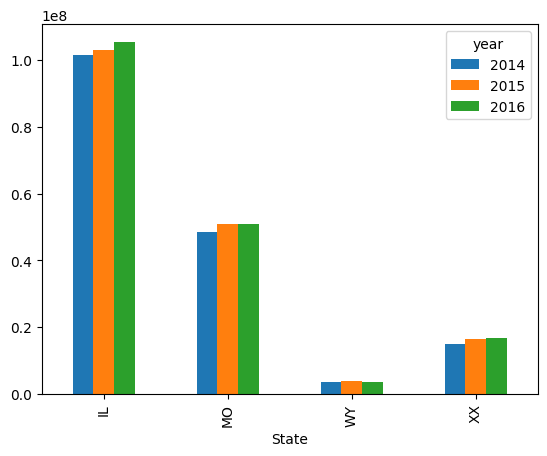

In [27]:
%matplotlib inline
answer.plot.bar()